## Tutorial 4. Network Modularity: Quantitative History

Created by Emanuel Flores-Bautista 2018.  All code contained in this notebook is licensed under the [Creative Commons License 4.0](https://creativecommons.org/licenses/by/4.0/).

This tutorial can be accesed here: https://programminghistorian.org/lessons/exploring-and-analyzing-network-data-with-python

### The data set: the Quaker Society of Friends. 

>Before there were Facebook friends, there was the Society of Friends, known as the Quakers. Founded in England in the mid-seventeenth century, the Quakers were Protestant Christians who dissented from the official Church of England and promoted broad religious toleration, preferring Christians’ supposed “inner light” and consciences to state-enforced orthodoxy. Quakers’ numbers grew rapidly in the mid- to late-seventeenth century and their members spread through the British Isles, Europe, and the New World colonies—especially Pennsylvania, founded by Quaker leader William Penn and the home of your four authors.

>Since scholars have long linked Quakers’ growth and endurance to the effectiveness of their networks, the data used in this tutorial is a list of names and relationships among the earliest seventeenth-century Quakers. This dataset is derived from the Oxford Dictionary of National Biography and from the ongoing work of the Six Degrees of Francis Bacon project, which is reconstructing the social networks of early modern Britain (1500-1700).

> Each Quaker node also has a number of associated attributes including historical significance, gender, birth/death dates, and SDFB ID—a unique numerical identifier that will enable you to cross-reference nodes in this dataset with the original Six Degrees of Francis Bacon dataset, if desired. Here are the first few lines:

In [12]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 
from operator import itemgetter
import TCD19_utils as TCD
TCD.set_plotting_style_2()
import community #Python Louvain package

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
x= pd.read_csv('../data/quakers_nodelist.csv')

In [5]:
x.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


In [6]:
y= pd.read_csv('../data/quakers_edgelist.csv')

In [7]:
y.head()

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [8]:
net = nx.from_pandas_edgelist(y, source= 'Source', target = 'Target')

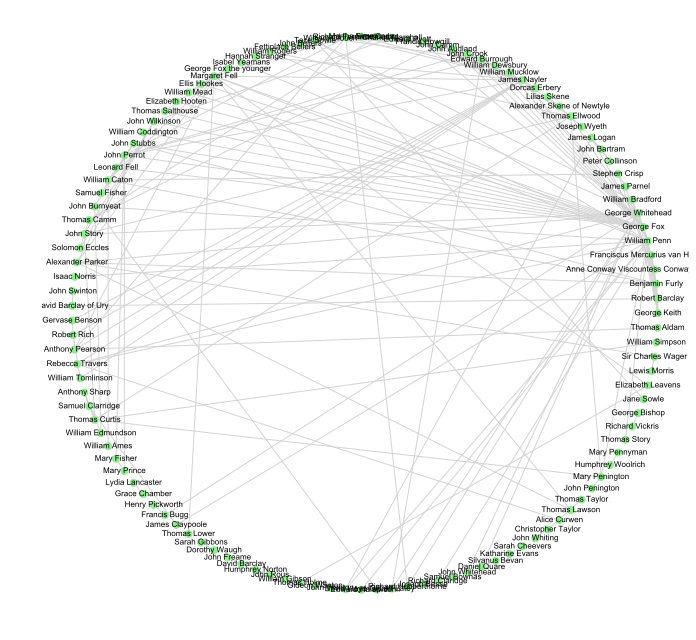

In [16]:
plt.figure(figsize =(9, 8.5))
nx.draw_circular(net,node_color="lightgreen", node_size=50, edge_size=20, edge_color="lightgrey",
                 with_labels= True, font_color="black", font_size= 8);

In [17]:
cc = nx.clustering(net)

In [18]:
cc_d= sorted(cc.items(), key= lambda cc: cc[1], reverse= True)[0:20]

In [19]:
net_degree_distribution= []

for i in list(net.degree()):
    net_degree_distribution.append(i[1])
    

Text(0,0.5,'PDF')

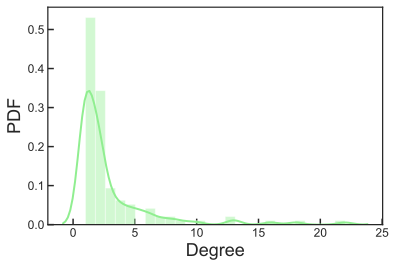

In [21]:
sns.distplot(net_degree_distribution, color = 'lightgreen')
plt.xlabel('Degree')
plt.ylabel('PDF')

In [24]:
def net_stats(G):
    
    net_degree_distribution= []

    for i in list(G.degree()):
        net_degree_distribution.append(i[1])
        
    print("Number of nodes in the network: %d" %G.number_of_nodes())
    print("Number of edges in the network: %d" %G.number_of_edges())
    print("Avg node degree: %.2f" %np.mean(list(net_degree_distribution)))
    print('Avg clustering coefficient: %.2f'%nx.cluster.average_clustering(G))
    print('Network density: %.2f'%nx.density(G))

    
    fig, axes = plt.subplots(1,2, figsize=(10,4))

    axes[0].hist(list(net_degree_distribution), bins=20, color = 'lightgreen')
    axes[0].set_xlabel("Degree $k$")
    #axes[0].set_ylabel("$P(k)$")
    
    axes[1].hist(list(nx.clustering(G).values()), bins= 20, color = 'lightgrey')
    axes[1].set_xlabel("Clustering Coefficient $C$")
    #axes[1].set_ylabel("$P(k)$")
    axes[1].set_xlim([0,1])
   

Number of nodes in the network: 119
Number of edges in the network: 174
Avg node degree: 2.92
Avg clustering coefficient: 0.23
Network density: 0.02


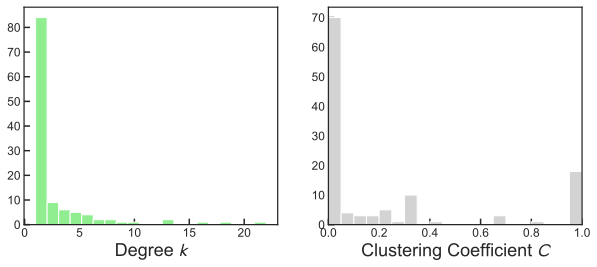

In [25]:
net_stats(net)

In [26]:
trn_lcc= max(nx.connected_component_subgraphs(net), key=len)

In [27]:
nx.average_shortest_path_length(trn_lcc)

3.3789473684210525

### Hubs in the network

In [28]:
eigen_cen= nx.eigenvector_centrality(net)
eigen_cen= sorted(eigen_cen.items(), key= lambda cc: cc[1], reverse= True)[:10]
eigen_cen

[('George Fox', 0.4491750710859924),
 ('James Nayler', 0.3352974100447868),
 ('William Penn', 0.2703220115399869),
 ('Margaret Fell', 0.253170949905681),
 ('George Whitehead', 0.2497455334914196),
 ('Edward Burrough', 0.231474276048623),
 ('Francis Howgill', 0.19095393782681053),
 ('Benjamin Furly', 0.1878520634691651),
 ('John Perrot', 0.1849692807795611),
 ('George Keith', 0.18384690867915351)]

We can see that the most central node in the network was George Fox. He may be in fact the most famous Quaker in history, do you find him familiar ? 

In [29]:
from IPython.display import Image

Image(url='http://www.abingtonmeeting.org/wp-content/uploads/2014/05/George_Fox.jpg')

In fact, all of these hubs of the network have an interesting history, you can Google them out to find out more. 

Let's look back at the data.

In [30]:
x.head()

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


Let's make our network richer and add some of our variables as attributes. First we'll make each column into a `pd.Series` object, and then turn it into a dictionary.

In [31]:
gender_dict= pd.Series(x['Gender'].values,index=x.Name).to_dict()
birth_dict= pd.Series(x['Birthdate'].values,index=x.Name).to_dict()
death_dict = pd.Series(x['Deathdate'].values,index=x.Name).to_dict()
id_dict = pd.Series(x['ID'].values,index=x.Name).to_dict()
his_sig= pd.Series(x['Historical Significance'].values,index=x.Name).to_dict()

Let's add our attributes to the network. 

In [32]:
nx.set_node_attributes(net, name = 'gender',values= gender_dict)
nx.set_node_attributes(net, name = 'birth',values= birth_dict)
nx.set_node_attributes(net, name = 'death',values= death_dict)
nx.set_node_attributes(net, name = 'id',values= id_dict)
nx.set_node_attributes(net, name = 'his_sig',values= his_sig)

Now we can easily scan our network using the ID, for example.

In [33]:
ID = nx.get_node_attributes(net, 'id')

In [34]:
ID['George Keith']

10006784

### Running the Louvain Clustering Algorithm 

The beauty of clustering networks in NetworkX with the community module, is that we can do it in one line of code. 

In [35]:
communities = community.best_partition(net)

In [36]:
communities

{'George Keith': 0,
 'Robert Barclay': 0,
 'Benjamin Furly': 0,
 'Anne Conway Viscountess Conway and Killultagh': 0,
 'Franciscus Mercurius van Helmont': 0,
 'William Penn': 1,
 'George Fox': 2,
 'George Whitehead': 3,
 'William Bradford': 1,
 'James Parnel': 0,
 'Stephen Crisp': 0,
 'Peter Collinson': 1,
 'John Bartram': 1,
 'James Logan': 1,
 'Joseph Wyeth': 4,
 'Thomas Ellwood': 4,
 'Alexander Skene of Newtyle': 5,
 'Lilias Skene': 5,
 'Dorcas Erbery': 6,
 'James Nayler': 6,
 'William Mucklow': 2,
 'William Dewsbury': 2,
 'Edward Burrough': 2,
 'John Crook': 2,
 'John Audland': 7,
 'John Camm': 7,
 'Francis Howgill': 6,
 'Edward Pyott': 7,
 'Charles Marshall': 7,
 'Anne Camm': 7,
 'Martha Simmonds': 6,
 'Richard Farnworth': 6,
 'William Crouch': 6,
 'Tace Sowle': 1,
 'John Bellers': 8,
 'Fettiplace Bellers': 8,
 'William Rogers': 4,
 'Hannah Stranger': 6,
 'Isabel Yeamans': 1,
 'George Fox the younger': 9,
 'Margaret Fell': 9,
 'Ellis Hookes': 2,
 'William Mead': 9,
 'Elizabeth Hoot

Let's add the cluster labels as an attribute

In [37]:
nx.set_node_attributes(net, values= communities, name='modularity')

In [38]:
eigenvector_dict = nx.eigenvector_centrality(net)
nx.set_node_attributes(net, values= eigenvector_dict, name= 'eigenvector')

In [39]:
sorted(eigenvector_dict.items(), key= lambda cc: cc[1], reverse= True)[:10]

[('George Fox', 0.4491750710859924),
 ('James Nayler', 0.3352974100447868),
 ('William Penn', 0.2703220115399869),
 ('Margaret Fell', 0.253170949905681),
 ('George Whitehead', 0.2497455334914196),
 ('Edward Burrough', 0.231474276048623),
 ('Francis Howgill', 0.19095393782681053),
 ('Benjamin Furly', 0.1878520634691651),
 ('John Perrot', 0.1849692807795611),
 ('George Keith', 0.18384690867915351)]

In [40]:
net.neighbors('Alexander Parker')

Let's extract module zero.

In [45]:
cluster_0 = [n for n in net.nodes() if net.node[n]['modularity'] == 0]

Let's compute the eigenvector centrality for the Module 0 

In [46]:
class0_eigenvector = {n:net.node[n]['eigenvector'] for n in cluster_0}

In [47]:
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

In [48]:
print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: Benjamin Furly | Eigenvector Centrality: 0.1878520634691651
Name: George Keith | Eigenvector Centrality: 0.18384690867915351
Name: John Stubbs | Eigenvector Centrality: 0.10693500692141825
Name: William Caton | Eigenvector Centrality: 0.0815603919987185
Name: Robert Barclay | Eigenvector Centrality: 0.05150537150437342


#### Centrality measures.

Finally, let's take it home with other centrality measures. 

In [49]:
cc= nx.closeness_centrality(net)
closeCen= sorted(cc.items(), key= lambda cc: cc[1], reverse= True)[:10]
closeCen

[('George Fox', 0.39222077357670576),
 ('William Penn', 0.3730880529144274),
 ('George Whitehead', 0.3540881983678594),
 ('Margaret Fell', 0.33842057897105143),
 ('James Nayler', 0.3310954582141023),
 ('George Keith', 0.3254597908402452),
 ('Benjamin Furly', 0.3213573565019228),
 ('Thomas Ellwood', 0.30230454880418034),
 ('Edward Burrough', 0.29759941963991293),
 ('Rebecca Travers', 0.29759941963991293)]

In [50]:
bc= nx.betweenness_centrality(net)
betweeness_centrality = sorted(bc.items(), key= lambda cc: cc[1], reverse= True)[:10]
betweeness_centrality

[('William Penn', 0.23999456006192194),
 ('George Fox', 0.23683257726065213),
 ('George Whitehead', 0.12632024847366005),
 ('Margaret Fell', 0.12106792237170327),
 ('James Nayler', 0.1044602628044609),
 ('Benjamin Furly', 0.06419626175167245),
 ('Thomas Ellwood', 0.04619062388510455),
 ('George Keith', 0.04500656400917155),
 ('John Audland', 0.041649363400775824),
 ('Alexander Parker', 0.03893676140525336)]

In [51]:
dc= nx.degree_centrality(net)
betweeness_centrality = sorted(dc.items(), key= lambda cc: cc[1], reverse= True)[:10]
betweeness_centrality

[('George Fox', 0.1864406779661017),
 ('William Penn', 0.15254237288135594),
 ('James Nayler', 0.13559322033898305),
 ('George Whitehead', 0.11016949152542373),
 ('Margaret Fell', 0.11016949152542373),
 ('Benjamin Furly', 0.0847457627118644),
 ('Edward Burrough', 0.07627118644067797),
 ('George Keith', 0.06779661016949153),
 ('Thomas Ellwood', 0.06779661016949153),
 ('Francis Howgill', 0.059322033898305086)]

### Conclusions

We can see that we can easily implement the Louvain clustering algorithm in Python. We also saw how to extract the clusters, and how to get some attributes from a particular module, for example, centrality measures. This has a ton of applications. What will you use it for ? 